In [1]:
import random

import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from stop_dependence import depth_accuracy_dependence

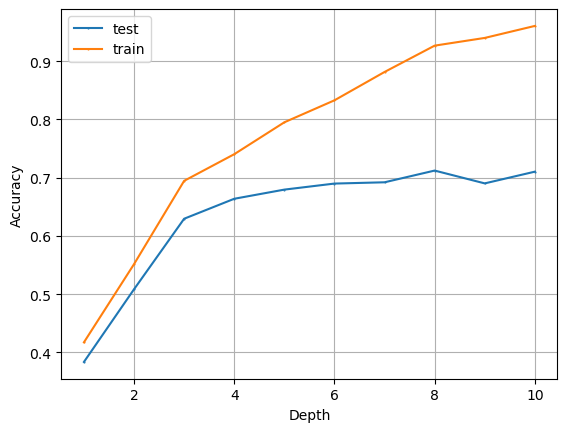

In [2]:
data = pd.read_csv('datasets/vehicle_csv.csv')
y = data['Class']
X = data.loc[:, 'COMPACTNESS':'HOLLOWS_RATIO']

# Tree parameters
train, test = depth_accuracy_dependence(X, y)
plt.plot(test, label='test', marker='.', markersize=1)
plt.plot(train, label='train', marker='.', markersize=1)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

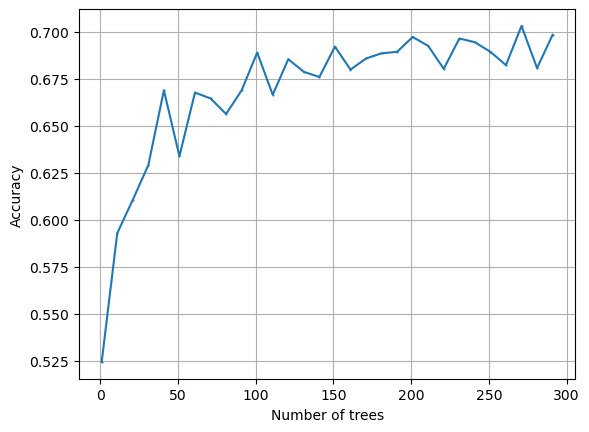

In [3]:
# AdaBoost
test_count = 10
dependence_test = Series(index=range(1, 301, 10), dtype=float)
for n in range(1, 301, 10):
    mean_accuracy_test = 0.
    for _ in range(test_count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000), train_size=0.7)
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=n)
        clf.fit(X_train, y_train)
        mean_accuracy_test += clf.score(X_test, y_test) / test_count
    dependence_test[n] = mean_accuracy_test
plt.plot(dependence_test, label='test', marker='.', markersize=1)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.grid()
plt.show()